# Изучение рынка заведений общественного питания города Москва
Автор: Дубина Екатерина  
Дата: 31.05.2025

### Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

In [4]:
#Вывод общей информации о датафрейме rest_df и первых строк
rest_info_df.info()
rest_info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Датафрейм *rest_df* представлен 8406 строками и 9 столбцами.

Индексы не именованы и представлены порядковыми номерами. 

Имена переменных указаны корректно.

В двух столбцах встречаются пропуски: hours,seats.

По типам данных:  
- строковые данные 6 столбцов. Учитывая, содержающуюся в них информацию, столбец hours корректней привести к числовому типу;
- целочисленные данные 1 столбец;
- числовые значения с плавающей точкой 2 столбца. Столбец seats далее логичнней привести к целочисленному типу.
  
Дополнительно для оптимизации можно варьировать разрядностью числовых столбцов. 

In [5]:
#Вывод общей информации о датафрейме price_df и вывод первых строк
rest_price_df.info()
rest_price_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Датафрейм *price_df* представлен 4058 строками и 5 столбцами.

Индексы не именованы и представлены порядковыми номерами.

Имена переменных указаны корректно в стиле snake case.

В четырех столбцах встречаются пропуски: price, avg_bill, middle_avg_bill, middle_coffee_cup.

По типам данных:  
- строковые данные 3 столбца;  
- числовые значения с плавающей точкой 2 столбца.

Типы данных корректны- преобразования не требуются. Но для оптимизации можно варьировать разрядностью числовых столбцов.

Первичное знакомство показывает, что значения в столбцах соответствуют описанию. Во втором датафрейме price_df встречается большое количество пропущенных значений, что потребует их детального изучение на этапе предобработки.  
Также есть существенное различие в количество строк в двух датафреймах. Чтобы не потерять часть данных из *rest_info*, которые далее могут потребоваться для решения аналитических задач, объединение корректней провести с использованием типа *left*.

In [6]:
# Объединение датафреймов методов megre по столбцу id
rest_df= rest_info_df.merge(rest_price_df, on='id', how='left')

In [7]:
#Вывод общей информации о датафрейме rest_df и вывод первых строк
rest_df.info()
rest_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных


На первом этапе при знакомстве с датафреймов столбцов не было выявлено потребности в преобразовании типов данных, но с целью оптимизации можно изменить разрядность числовых типов. Для этого воспользуемся методом to_numeric с параметром downcast.

In [8]:
#изменение размерности для chain с целочисленным типом
rest_df['chain']=pd.to_numeric(rest_df['chain'], errors='coerce', downcast='integer')

In [9]:
#изменение размерности для переменных с вещественным типом
columns_change= ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']
for column in columns_change:
    rest_df[column]=pd.to_numeric(rest_df[column], errors='coerce', downcast='float')

In [10]:
#вывод типов данных после корректировок
rest_df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

Как показал первичный анализ данных в них содержатся пропуски. Поэтому далее проведем их подсчет в абсолютном и относительном значении, определим возможные причины их появления и если потребуется сделаем обработку. 

In [11]:
#Подсчет пропусков в абсолютном значении
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
#Подсчет пропусков в относительном значении
rest_df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

In [13]:
#вывод случайных строк, в которых указан средний чек, но не указана категория цен 
rest_df[(rest_df['avg_bill'].notna()) & (rest_df['price'].notna())].sample(10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
6604,36b0becc10804fd897af9bf9855c0bfc,Shrimp Kitchen,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.4,0,NaN,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
2341,e48f95a246374357ad79218fa0f49c7f,Фитнес-бар,"бар,паб","Москва, улица Сущёвский Вал, 56, стр. 1",Центральный административный округ,"ежедневно, 10:00–20:00",4.2,0,200.0,средние,Средний счёт:от 800 ₽,800.0,NaN
7788,6ec9eb8a870f4a03a3efb820c5c79860,Атмосфера Хинкальная,ресторан,"Москва, Касимовская улица, 4",Южный административный округ,"ежедневно, 11:00–02:00",4.1,0,48.0,средние,Средний счёт:500 ₽,500.0,NaN
3059,1b681f18bc74487a8c77ee8b60914982,Korean Chick,кафе,"Москва, Кунцевская улица, 5",Западный административный округ,"ежедневно, 10:00–22:00",4.2,1,NaN,средние,Средний счёт:750–1000 ₽,875.0,NaN
3785,990a1edfda7b4627b898dd962d8e9e1c,Kaif Provenance,ресторан,"Москва, улица Большая Дмитровка, 13",Центральный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–05:00; вс 11:00...",4.4,0,220.0,высокие,Средний счёт:2000–2500 ₽,2250.0,NaN
1265,c932695a24834e4a8aa5337d44db973b,TaAm hummus bar,"бар,паб","Москва, Волоколамское шоссе, 6",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,Средний счёт:500–800 ₽,650.0,NaN
2094,3bb007db2bc046c2bf918a5e1cf253c4,Хорошие люди,ресторан,"Москва, Полковая улица, 3, стр. 5",Северо-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 08:00–18:00",4.0,0,120.0,средние,Средний счёт:150–600 ₽,375.0,NaN
6247,713168e06d2e495197d0054f42c06eae,Чайхана Зейтун,кафе,"Москва, Малая Тульская улица, 57, корп. 1",Южный административный округ,"ежедневно, 09:00–00:00",4.0,0,NaN,средние,Средний счёт:300–600 ₽,450.0,NaN
4140,743ab239320a42b6827a693d1a93aed0,Моремясо,"бар,паб","Москва, 1-й Красногвардейский проезд, 15",Центральный административный округ,"ежедневно, 12:00–00:00",4.4,0,236.0,высокие,Средний счёт:3000–3500 ₽,3250.0,NaN
5123,c35df4e972814eb4b95b312cc7f692aa,ZinTea,кофейня,"Москва, Стремянный переулок, 38",Центральный административный округ,"ежедневно, 10:00–22:00",4.5,0,94.0,средние,Средний счёт:300–500 ₽,400.0,NaN


In [14]:
# проверка уникальных значений Категории для заведений без пропусков в среднем чеке
rest_df[rest_df['avg_bill'].notna()]['category'].unique()

array(['ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'столовая', 'булочная'], dtype=object)

In [15]:
# проверка уникальных значений Категории для заведений без пропусков в категории цены
rest_df[rest_df['price'].notna()]['category'].unique()

array(['ресторан', 'кафе', 'пиццерия', 'бар,паб', 'быстрое питание',
       'столовая', 'кофейня', 'булочная'], dtype=object)

In [16]:
# проверка уникальных значений Округа для заведений без пропусков в среднем чеке
rest_df[rest_df['avg_bill'].notna()]['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [17]:
# проверка уникальных значений Округа для заведений без пропусков в категории цены
rest_df[rest_df['price'].notna()]['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Пропуски найдены в столбцах: hours, seats, price, avg_bill, middle_avg_bill, middle_coffee_cup.

- *hours* и *seats* 6% и 43% пропусков соответственно. Пропуски имеют существеный удельный вес. Удаляя все эти строки будет утерян большой объем данных, а заменяя на среднее/моду/медиану или вводя индикатор (0/ unknown), можно исказить данные и получить аномалии. Наиболее оптимальный вариант- оставить пропуски. 

Т.к. изначально в датафрейме rest_price было более чем в два раза меньше заведений, это объясняет большой удельный вес пропусков в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup. 

- *price* и *avg_bill* 60.5% и 54.6% пропусков соответственно. Взаимосвязи с параметрами из датафрейма rest_info (category, district) не выявлено (есть данные по всем возможным категориям и округам). В результате можно предположить, что отсутствие информации вызвано какими-то не участвующими в анализе параметрами (вид MNAR). В avg_bill пропусков меньше, чем в price, а значит через создание пользовательской функции с заданием условий, например, по совпадению категории и округа, на основе данных из avg_bill, возможно было бы заполнить часть пропусков в price. Но вывод случайных строк датафрейма не подтвердил наличие явной связи между категорией цены и средней ценой (есть записи где для одного и того же диапазона средней цены указаны разные категории). Поэтому все пропуски оставлены, тем более эти столбцы не являются ключевыми для проводимого исследовательского анализа. 
- *middle_avg_bil*l и *middle_coffee_cup* 62.5% и 93.6% пропусков соответственно. Можно отнести к виду MAR, т.к. их наличие объясняется переменной датафрейма- avg_bill. Если в avg_bill не содержится информация о "Среднем чеке' или 'Цене одной чашки капучино', то значений в столбце middle_avg_bill или middle_coffee_cup соответственно не будет. При этом количество пропусков в столбце avg_bill меньше чем сумма пропусков в столбцах middle_avg_bill и middle_coffee_cup. Но это не является ошибкой, т.к. вывод уникальных значений avg_bill показал наличие не только информации о среднем чеке или цене чашки капучино, но и других данных, например 'Цена бокала пива'. Учитывая содержание этих столбцов и долю пропусков в них: удаление нецелесообразно, т.к. будет утеряна информации о больше 90% заведений; заполнение нецелесообразно, т.к. например параметр middle_coffee_cup вряд ли будет иметь ценность для бизнеса в категориях отличных от кофейни, более того эти поля не являются ключевыми для требуемого исследовательского анализа.

В столбце *seats* помимо пропусков встрчаются нулевые значения. Можно было бы сделать предложить, что их наличие объясняется категорией заведения (например, бар или паб), но как показала выгрузка нулевые значения встречаются по всем категориям, поэтому их можно расценивать как отсутствие инфомрации о количестве посадочных мест в заведении и заменить нули на пропуски.

In [18]:
rest_df[rest_df['seats']== 0]['category'].unique()

array(['булочная', 'ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'столовая'], dtype=object)

In [19]:
#замена 0 в столбце seats на NaN
rest_df['seats']=rest_df['seats'].replace(0, None)

Следующем этапом проведем анализ датафрейма на наличие явных и неявных дубликатов с последующим удаление.  
Для выявления неявных дубликатов изучим значения в текстовых столбцах и нормализуемых данных в столбцах *name* и *address*.

In [20]:
rest_df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [21]:
rest_df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [22]:
rest_df['address'].unique()

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

In [23]:
#удаления явных дубликатов и подсчет строк после удаления 
rest_df.drop_duplicates().shape[0]

8406

После применения метода drop_duplicates количество строк датафрейма не изменилось, следовательно явных дубликатов не выявлено.

In [24]:
# приведение названий к нижнему регистру, удаление пробелов в начале и конце строки, замена _ на пробел, удаление множественных пробелов
rest_df['name']= rest_df['name'].str.lower().str.strip().str.replace('_', ' ').str.replace(r'\s+', ' ', regex=True)
rest_df['address']= rest_df['address'].str.lower().str.strip().str.replace('_', ' ').str.replace(r'\s+', ' ', regex=True)

In [25]:
#вывод дубликатов после нормализации данных в двух столбцах
rest_df[rest_df.duplicated()== True]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [26]:
#вывод дубликатов по двум полям 'name', 'address'
rest_df[rest_df.duplicated(subset=['name', 'address'], keep=False)== True]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


Все выведенные записи с большой вероятностью можно отнести к дубликатам: совпадение ни только в связке *name*-*address*, но и рейтинге, количестве посадочных мест. В части *chain* изначально в описании данных было допущение о том, что в данных могут встречаться ошибки. Есть отличие в категория и графике работы, но эти параметры можно расценить как ошибку или субъективное мнение при определении категории заведения.

In [27]:
#удаление дубликатов по связке name-address 
rest_df.drop_duplicates(subset=['name', 'address'], inplace= True)

In [28]:
# разделение данных в столбце hours по символу пробелара
hours_df= rest_df['hours'].str.split(' ', expand=True)

In [29]:
#вывод уникальных значений первого столбца
hours_df[0].unique()

array(['ежедневно,', 'пн-чт', 'пн', 'вт-сб', 'пн-пт', nan, 'пн-сб',
       'вт-вс', 'пн,вт,ср,чт,пт,вс', 'пн,ср,чт,пт,сб,вс', 'чт', 'вт,чт',
       'пн-ср', 'вт-пт', 'чт-вс', 'сб', 'пт-вс', 'пн,вт', 'пт,сб',
       'вт-чт', 'сб,вс', 'ср-пт', 'пн,вт,чт,пт,сб,вс', 'ср-вс', 'ср,чт',
       'вт', 'пт', 'пн,вт,ср,чт,вс', 'Нет', 'пн,вс', 'вт,чт,пт,сб,вс',
       'пн,вт,ср,пт,сб,вс', 'пн,вт,ср,чт,сб,вс', 'ср'], dtype=object)

In [30]:
#вывод уникальных значений второго столбца
hours_df[1].unique()

array(['10:00–22:00', '11:00–02:00;', '09:00–22:00', '10:00–23:00',
       '15:00–04:00;', '10:00–22:00;', '12:00–00:00', 'круглосуточно',
       '10:00–21:00', '09:00–18:00', '08:00–22:00', '13:00–00:00',
       '08:30–18:30;', '09:00–21:00', '11:00–22:00;', '08:00–22:00;',
       '10:00–19:00', '09:00–16:00', '08:00–21:00', '09:00–23:00',
       '08:00–23:00', nan, '08:00–18:00', '09:00–19:00', '11:00–00:00',
       '09:00–02:00', '12:00–23:00', '12:00–03:00', '16:00–06:00',
       '12:30–00:00;', '11:00–23:00;', '08:00–19:00', '12:00–23:00;',
       '09:00–01:00', '11:00–23:00', '10:00–21:00;', '08:30–17:00',
       '09:00–22:00;', '14:00–00:00;', '08:30–18:30', '12:00–03:00;',
       '09:00–20:00', '07:30–18:30', '09:00–06:00', '10:00–21:30',
       '08:00–00:00', '06:00–20:00', '10:00–20:00', '11:00–22:00',
       '10:30–23:00', '07:00–00:00', '10:00–22:00,', '13:00–04:00',
       '08:00–20:00;', '11:00–00:00;', '12:00–02:00;', '08:00–16:00',
       '11:00–19:00', '08:00–21:00;', 

In [31]:
#удаление пробелов, запятых во втором столбце
hours_df[1]= hours_df[1].replace(r'[\s;,]', '', regex=True)

In [32]:
#вывод уникальных значений второго столбца после корректировки 
hours_df[1].unique()

array(['10:00–22:00', '11:00–02:00', '09:00–22:00', '10:00–23:00',
       '15:00–04:00', '12:00–00:00', 'круглосуточно', '10:00–21:00',
       '09:00–18:00', '08:00–22:00', '13:00–00:00', '08:30–18:30',
       '09:00–21:00', '11:00–22:00', '10:00–19:00', '09:00–16:00',
       '08:00–21:00', '09:00–23:00', '08:00–23:00', nan, '08:00–18:00',
       '09:00–19:00', '11:00–00:00', '09:00–02:00', '12:00–23:00',
       '12:00–03:00', '16:00–06:00', '12:30–00:00', '11:00–23:00',
       '08:00–19:00', '09:00–01:00', '08:30–17:00', '14:00–00:00',
       '09:00–20:00', '07:30–18:30', '09:00–06:00', '10:00–21:30',
       '08:00–00:00', '06:00–20:00', '10:00–20:00', '10:30–23:00',
       '07:00–00:00', '13:00–04:00', '08:00–20:00', '12:00–02:00',
       '08:00–16:00', '11:00–19:00', '16:00–04:00', '09:00–00:00',
       '15:00–19:00', '10:00–01:00', '11:00–05:00', '11:00–22:30',
       '07:30–00:30', '08:30–23:30', '17:00–00:00', '13:00–01:00',
       '11:00–06:00', '07:00–23:00', '18:00–05:00', '11

In [33]:
#создание пользовательской функции для заполнения значений в столбце *is_24_7*
def is_24_7(row):
    if (row[0]== 'ежедневно,') & (row[1]== 'круглосуточно'):
        return True
    else:
        return False 

hours_df['is_24_7']= hours_df.apply(is_24_7, axis=1)

In [34]:
hours_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,is_24_7
0,"ежедневно,",10:00–22:00,None,None,None,None,None,None,None,None,None,None,False
1,"ежедневно,",10:00–22:00,None,None,None,None,None,None,None,None,None,None,False
2,пн-чт,11:00–02:00,"пт,сб",11:00–05:00;,вс,11:00–02:00,None,None,None,None,None,None,False
3,"ежедневно,",09:00–22:00,None,None,None,None,None,None,None,None,None,None,False
4,"ежедневно,",10:00–22:00,None,None,None,None,None,None,None,None,None,None,False


In [35]:
#удаление лишних столбоц
hours_df.drop(hours_df.iloc[:, 0:12], axis=1, inplace=True)

In [36]:
#добавление к анализируемому датафрейму параметр is_24_7
rest_df= rest_df.join(hours_df, how='inner')

In [37]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7867 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4734 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(4), int8(1), object(8)
memory usage: 996.5+ KB


На этапе предобработки данных:

- проведен детальный анализ пропусков, по результатам которого принято решение оставить исходный датафрейм без изменений;
- осуществлена проверка на наличие дубликатов (явных не выявлено, неявные после нормализации стороковых данных удалены в количестве 4 шт.);
- проведена оптимизация типов данных, а именно изменение разрядности числовых типов данных;
- добавлен новый столец *is_24_7* булевого типа с информацией о графике работы заведения (True- ежедневно и круглосуточно, False- иной график).

По результату для исследовательного анализа будет использован датафрейм *rest_df*, содержащий 14 столбцов и 8402 строк. 

## 3. Исследовательский анализ данных

### Задача 1

Исследование категорий заведений. Какие категории заведений представлены в данных? Какое количество объектов общественного питания по каждой категории?

In [38]:
# Проверка распределения данных по значениям столбца category
print('Распределение данных по значениям столбца category (абсолютные значения):')
rest_df['category'].value_counts()

Распределение данных по значениям столбца category (абсолютные значения):


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [39]:
print('Распределение данных по значениям столбца category (относительные значения):')
rest_df['category'].value_counts(normalize=True)

Распределение данных по значениям столбца category (относительные значения):


кафе               0.282790
ресторан           0.243037
кофейня            0.168174
бар,паб            0.090931
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: category, dtype: float64

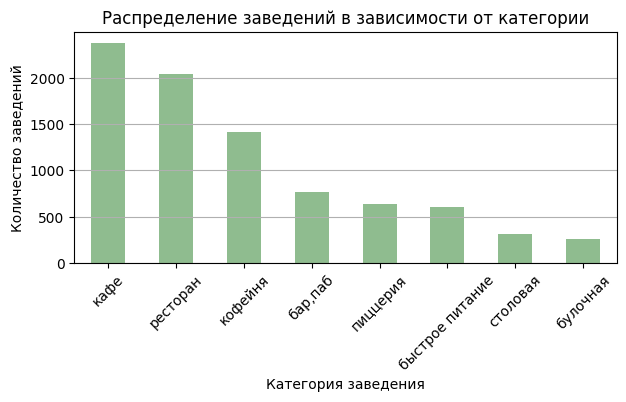

In [40]:
#построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df['category'].value_counts().plot(
                                    kind='bar',
                                    figsize=(7,3),
                                    color='darkseagreen',
                                    rot=45
)

plt.title('Распределение заведений в зависимости от категории')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid(axis='y')
                                    
plt.show()

Для ответа на вопросы построена столбчатая диаграмма (т.к. анализ данных категориального типа), которая позволила выделить все категорий заведений общественного питания г.Москвы и увидеть их количество. Заведения между категориями распределены неравномерно. Наибольшее количество заведений относится к категориям *Кафе* и *Ресторан* (свыше `2000`). Наименее часто встречающие заведения- *Столовая* и *Булочная* (менее `500`).


### Задача 2

Исследования заведений по районам. Какие административные районы Москвы присутствуют в данных? Какое количество заведений по каждому административному району Москвы?   
Как распределены категории заведений в Центральном административном округе Москвы?

In [41]:
print('Распределение данных по значениям столбца district:')
rest_df['district'].value_counts()

Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [42]:
#Т.к. названия объемные, исключаем формулировку ' административный округ' методом replace()
rest_df['district']= rest_df['district'].str.replace(' административный округ', '')

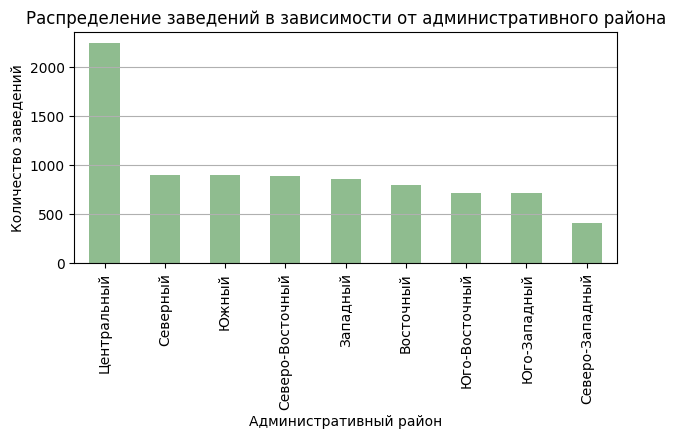

In [43]:
#построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df['district'].value_counts().plot(
                                kind='bar',
                                figsize=(7,3),
                                color='darkseagreen'
)

plt.title('Распределение заведений в зависимости от административного района')
plt.xlabel('Административный район')
plt.ylabel('Количество заведений')
plt.grid(axis='y')

plt.show()

Для ответа на вопросы также построена столбчатая диаграмма.   
Существенным лидером по количеству заведений является *Центральный район* (свыше `2000`), во всех остальных районах заведения представлены в количестве менее `1000`. Аутсайдером выступает *Северо-Запад* (`409` заведений).   

Далее посмотрим на распределение категорий заведения внтури района-лидера.

In [44]:
# Проверка распределения данных по значениям столбца category для Центрального района
print('Распределение данных по значениям столбца category для Центрального района:')
rest_df[rest_df['district']=='Центральный']['category'].value_counts()

Распределение данных по значениям столбца category для Центрального района:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

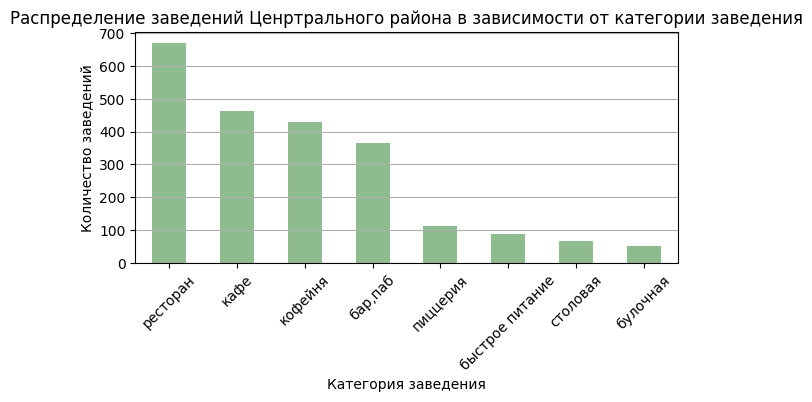

In [45]:
#построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df[rest_df['district']=='Центральный']['category'].value_counts().plot(
                                                                kind='bar',
                                                                figsize=(7,3),
                                                                color='darkseagreen',
                                                                rot= 45
)  

plt.title('Распределение заведений Ценртрального района в зависимости от категории заведения')
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
plt.grid(axis='y')

plt.show()

В центральном районе в отличие от общих значений по г.Москва на первой позиции находится *Ресторан* (свыше `600` заведений), *Кафе*- лидер среди заведений по общим данным, занимает вторую позицию (чуть более `450` заведений). По остальным категориям картина аналогичная агрегированным по г.Москве данным.

### Задача 3

Исследование заведений по *Сетевому* признаку. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [46]:
# распределение данных по значениям в столбце chain в отсносительном значении
print('Распределение данных по значениям столбца chain:')
rest_df['chain'].value_counts(normalize=True)

Распределение данных по значениям столбца chain:


0    0.618781
1    0.381219
Name: chain, dtype: float64

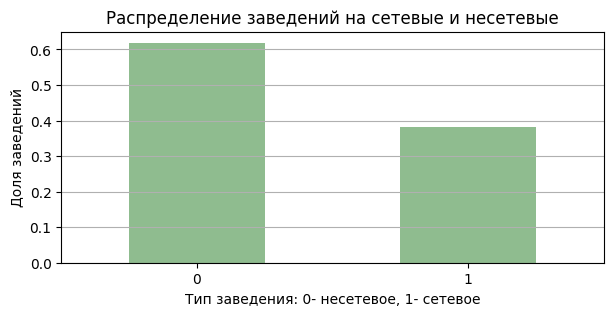

In [47]:
# построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df['chain'].value_counts(normalize=True).plot(
                                                kind='bar',
                                                figsize=(7,3),
                                                color='darkseagreen',
                                                rot=0
)

plt.title('Распределение заведений на сетевые и несетевые')
plt.xlabel('Тип заведения: 0- несетевое, 1- сетевое')
plt.ylabel('Доля заведений')
plt.grid(axis='y')

plt.show()

Для визуализации выбрана столбчатая диаграмма (т.к. анализируется категориальный признак).   
Большая часть заведений (`62%`) относится к *несетевым*. Но не стоит исключать тот факт, что в данных могут быть ошибки ввиду отнесения к сетевым заведениям только крупных сетей.  

Дополнительно отразим то же распределение на круговой диаграмме.

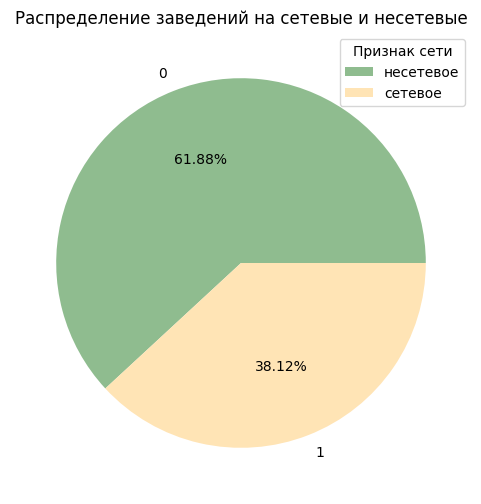

In [48]:
rest_df['chain'].value_counts(normalize=True).plot(kind='pie',
                                                  colors=['darkseagreen','moccasin'],
                                                  figsize=(6,6),
                                                  autopct='%1.2f%%'
                                                  )

plt.title('Распределение заведений на сетевые и несетевые')
plt.legend(title='Признак сети', labels=['несетевое', 'сетевое'])
plt.ylabel('')

plt.show()

Далее посмотрим на распределение категорий в разрезе сетевое/ несетевое заведение.

In [49]:
# распределение данных по значениям столбца chain с группировкой по category в относительных значениях
print('Распределение данных по значениям столбца chain:')
rest_df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=True)

Распределение данных по значениям столбца chain:


chain,0,1
category,,
"бар,паб",0.780105,0.219895
булочная,0.386719,0.613281
быстрое питание,0.615257,0.384743
кафе,0.672138,0.327862
кофейня,0.490446,0.509554
пиццерия,0.478673,0.521327
ресторан,0.642997,0.357003
столовая,0.720635,0.279365


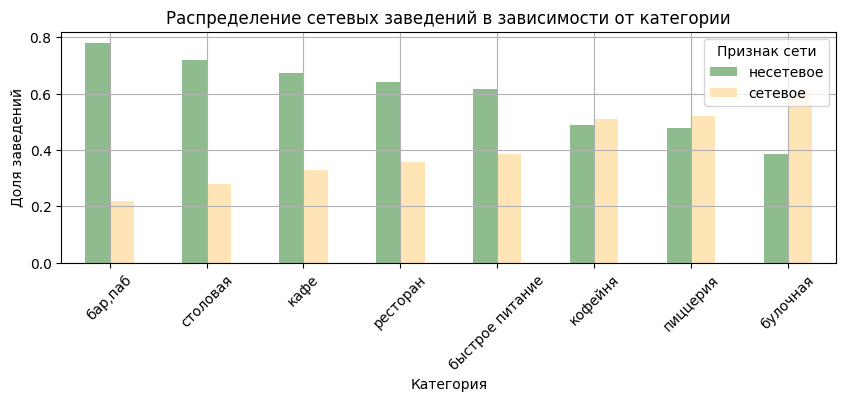

In [50]:
# построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0).sort_values(by=0, ascending=False).plot(
                                                                        kind='bar',
                                                                        figsize=(10, 3),
                                                                        color=['darkseagreen','moccasin'],
                                                                        rot=45
                                                                                    
    
)

plt.title('Распределение сетевых заведений в зависимости от категории')
plt.xlabel('Категория')
plt.ylabel('Доля заведений')
plt.grid()
plt.legend(title='Признак сети', labels=['несетевое', 'сетевое'])

plt.show()

Если смотреть на признак *Сети*,в разрезе *Категорий*, то *сетевыми* заведениями чаще всего являются *булочные*, а также *кофейни* и *пиццерии* (более половины из всех представленных в категории заведений).

### Задача 4

Исследование количества посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Определение для каждой категории заведений наиболее типичное для него количество посадочных мест. 

In [51]:
#вывод статистических показателей столбца seats
print('Статистические показатели столбца seats:')
rest_df['seats'].describe()

Статистические показатели столбца seats:


count    4734.000000
mean      111.379807
std       124.031227
min         1.000000
25%        40.000000
50%        78.000000
75%       141.000000
max      1288.000000
Name: seats, dtype: float64

Вероятнее всего, данные по количеству посадочных мест имеют асимметричное распределение. Об этом говорит существенная разница среднего и медианного значений. Стандартное отклонение также имеет высокое значение. Это указывает на то, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает.

Для дополнительной проверки далее построим гистограмму распределения значений и диаграмму размаха.

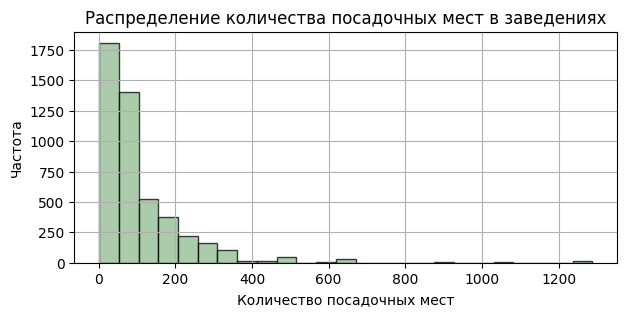

In [52]:
# построение гистограммы с помощью pandas через plot(kind='hist')
rest_df['seats'].plot(
                    kind='hist',
                    figsize=(7,3),
                    bins=25,
                    edgecolor='black',
                    color='darkseagreen',
                    alpha=0.75)

plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()

plt.show()

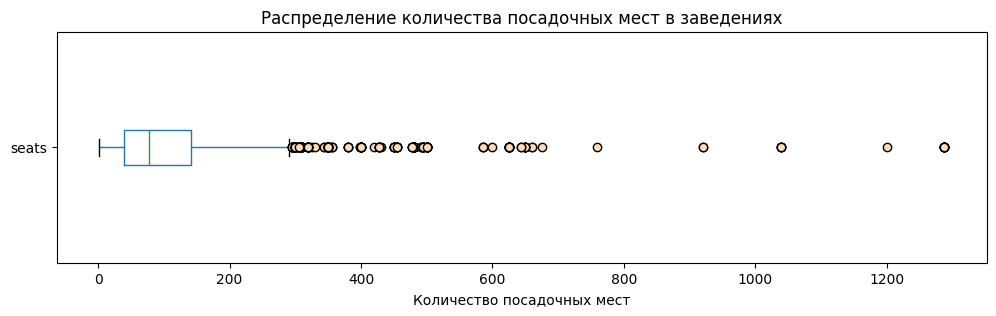

In [53]:
# построение диаграммы размаха с помощью pandas через plot(kind='box')
rest_df['seats'].plot(
                    kind='box',
                    vert=False,
                    figsize=(12,3),
                    flierprops=dict(markerfacecolor='peachpuff')
)

plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')

plt.show()

Гистограмма и диаграмма размаха подтвердили выводы сделанные выше.   
Распределение смещено влево и большая часть значений находится в диапазоне `1-200`. Пик приходится на заведения, рассчитанные на количество `до 50` человек. Значения выше 300 относятся к выбросам. Учитывая количество, их удаление приведет к существенному сокращению датафрейма. Более того, т.к. анализируются заведения мегаполиса, количество посадочных мест в размере 300 выглядит вполне правдоподобным, например, это могут быть рестораны, целевое назначение которых- проведение крупных банкетных мероприятий, или фудкорты. А вот значения приближенные к 600 и выше выглядят как аномалии, но в датафрейме они имеют небольшой удельный вес.   

Далее проведем подсчет типичного количества посадочных мест в разрезе категорий, используя медиану, т.к. среднее значение может быть сильно искаженнным ввиду наличия выбросов.

In [54]:
#подсчет медианы количества посадочных мест в разрезе категорий
rest_df.groupby('category')['seats'].median()

category
бар,паб            84.0
булочная           60.0
быстрое питание    75.0
кафе               60.0
кофейня            80.0
пиццерия           56.0
ресторан           90.0
столовая           76.0
Name: seats, dtype: float32

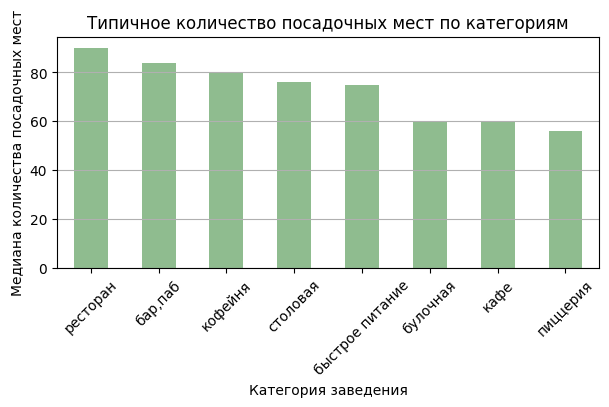

In [55]:
#построение столбчатой диаграммы с помощью pandas через plot(kind='bar')
rest_df.groupby('category')['seats'].median().sort_values(ascending=False).plot(
                                            kind='bar',
                                            figsize=(7,3),
                                            color='darkseagreen',
                                            rot=45
)

plt.title('Типичное количество посадочных мест по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Медиана количества посадочных мест')
plt.grid(axis='y')

plt.show()

Категория заведения не оказывает существенного влияния на количество посадочных мест. Размах значение небольшой: все они находятся в диапазоне `от 56 до 90`. Максимальное характерно для категории *ресторан*.

### Задача 5

Исследование рейтинга заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [56]:
#подсчет среднего рейтинга в разрезе категорий
rest_df.groupby('category')['rating'].mean()

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32

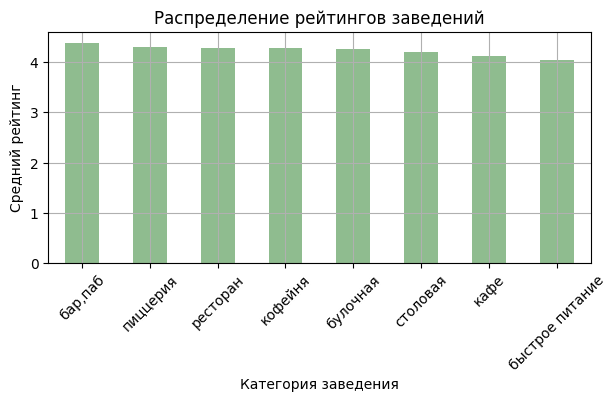

In [57]:
rest_df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(7,3),
    color='darkseagreen',
    rot=45
)

plt.title('Распределение рейтингов заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.grid()

plt.show()

Для визуализации выбрана столбчатая диаграмма, т.к. анализируется рейтинг в разрезе категорий.  
Категория заведения не оказывает существенного влияния на рейтинг. Разница минимальная: все значения в интервале `4.05-4.39`. Максимум принадлежит *барам* и *пабам*.

### Задача 6  
Исследование корреляция рейтинга заведений с другими параметрами. А именно: категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Визуализация самой сильной связи.

In [58]:
#построение матрицы корреляции
corr_matrix = rest_df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

corr_matrix[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


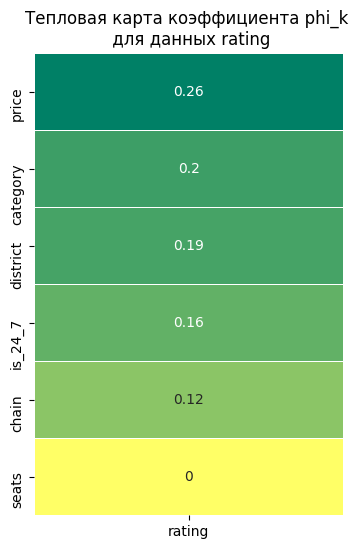

In [59]:
#сохранение матрицы корреляции признака rating в отлельном датафрейме
corr_heatmap= corr_matrix[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

#построение тепловой карты 
plt.figure(figsize=(4,6))

sns.heatmap(data=corr_heatmap, 
            annot=True, 
            cmap='summer_r',
            linewidths=0.3,
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.show()

Для изучения взаимосвязи между *рейтингом* и др. параметрами (*категория, положение, статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным*) построена матрица корреляции и на ее основе тепловая карта. Т.к. в выбранном для анализа срезе данных есть как категориальные, так и числовые значения, использована библиотка *phik*.  

Наибольшая корреляция рейтинга наблюдается с ценовой категорией (`0.26`), категорией (`0.2`) и положение (`0.19`). Для остальных признаков коэффициент корреляции снижается с 0.16 до 0.

Т.к. самая сильная связь наблюдается между числовой переменной (*рейтинг*) и категориальным значением (*ценовая категория*) для более детального изучения построим гистограммы распределения для каждой категории цены.

In [60]:
#т.к. в price есть пропуски, создаем датафрейм без них, чтобы исключить упоминание о None в легенде
df_for_hist=rest_df.dropna(subset=['price'])

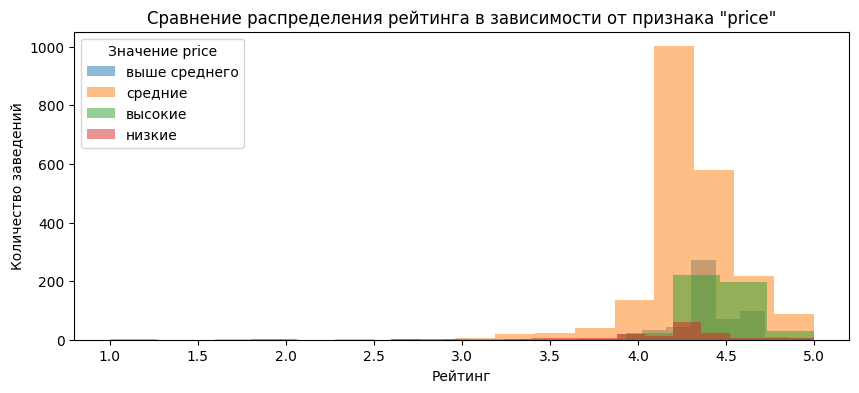

In [61]:
#создание фигуры графика
plt.figure(figsize=(10, 4))

#построение гистограммы для каждого значения category
for i in df_for_hist['price'].unique():
    df_for_hist[df_for_hist['price']==i]['rating'].plot(kind='hist',
                                                        bins=15,
                                                        alpha=0.5,
                                                        label= i,
                                                        legend=True
                                                       )
plt.title('Сравнение распределения рейтинга в зависимости от признака "price"')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.legend(title='Значение price')
plt.show()            

Т.к. заведения между ценовыми категориями распределены неравномерно, дополнительно для наглядности построим график KDE. 

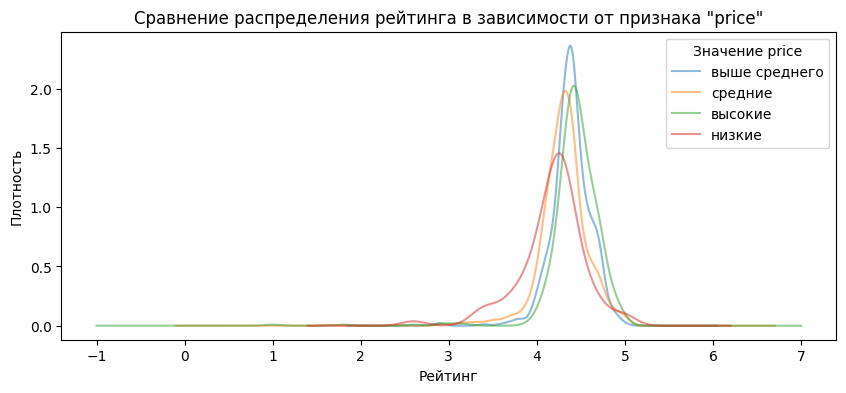

In [62]:
#создание фигуры графика
plt.figure(figsize=(10, 4))

#построение графика KDE для каждого значения category
for i in df_for_hist['price'].unique():
    df_for_hist[df_for_hist['price']==i]['rating'].plot(kind='kde',
                                                        alpha=0.5,
                                                        label= i,
                                                        legend=True
                                                       )
plt.title('Сравнение распределения рейтинга в зависимости от признака "price"')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')
plt.legend(title='Значение price')
plt.show()                

На графике видно, что распределение рейтинга находится примерно в одном диапазоне для разных ценовых категорий. Есть смещение влево для *низкой* категории и вправо для *высокой*, но они незначительны. Отличие в высоте графиков указывает на разброс значений.  
Таким образом, проверка через визуализацию подтвердила слабую зависимость для самой 'сильной' связи согласно матрице корреляции.

### Задача 7

Исследование топ-15 популярных сетей в Москве (популярность- количество заведений сети). Какой их средний рейтинг? К какой категории заведений они относятся? 

In [63]:
#создание датафрейма на основе сгруппированных по названию заведения данных, с выводом данных агрегированных по количеству и среднему рейтингу и добавлением категории
name_group_df=rest_df[rest_df['chain']==1].groupby(['name', 'category']).agg({'id': 'count', 'rating': 'mean'}).reset_index().sort_values(by='id', ascending=False)

In [64]:
#топ-15 сетей по количеству заведений
name_group_df= name_group_df.iloc[0:15]

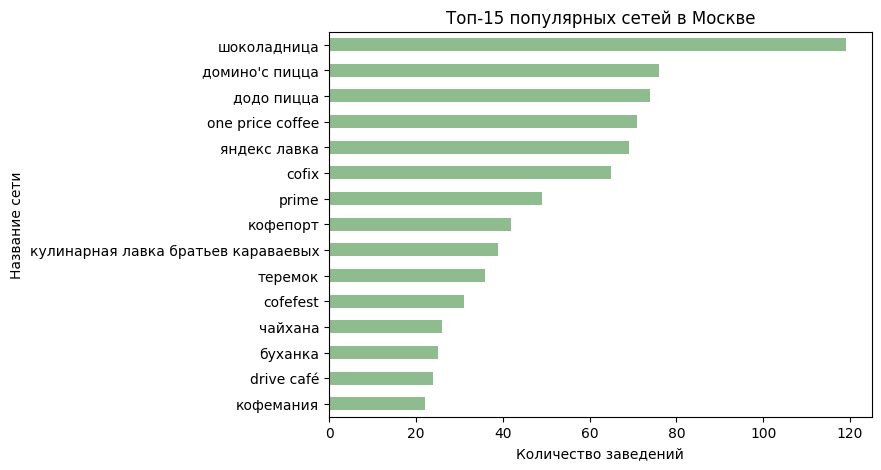

In [65]:
#изменение направления сортировки датафрейма для построения диаграммы
name_group_df= name_group_df.iloc[0:15].iloc[::-1]

#построение горизонтальной столбчатой диаграммы с топ-15 сетей
name_group_df.plot(kind='barh',
                   x='name',
                   y='id',
                   figsize=(7,5),
                   legend=False,
                   color='darkseagreen',
                   )

plt.title('Топ-15 популярных сетей в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')

plt.show()

In [66]:
#создание сводной таблицы на основе датафрейма name_group_df для разделения сетей на категории
name_pivot_table= name_group_df.pivot_table(index=['category', 'name'],
                    values=['id', 'rating']
                    )
#переименование столбцов
name_pivot_table= name_pivot_table.rename(columns={'id':'Количество заведений', 'rating':'Средний рейтинг'})
#сортировка данных в сводной таблице
name_pivot_table=name_pivot_table.sort_values(by=['category', 'name', 'Количество заведений'], ascending=[True, True, False])
#округлений значений в столбце Средниц Рейтинг
name_pivot_table['Средний рейтинг']=name_pivot_table['Средний рейтинг'].round(2)

name_pivot_table

Количество заведений  \
category name                                                        
булочная буханка                                                25   
кафе     drive café                                             24   
         кулинарная лавка братьев караваевых                    39   
         чайхана                                                26   
кофейня  cofefest                                               31   
         cofix                                                  65   
         one price coffee                                       71   
         кофемания                                              22   
         кофепорт                                               42   
         шоколадница                                           119   
пиццерия додо пицца                                             74   
         домино'с пицца                                         76   
ресторан prime                                                  49   
         теремок                                                36   
         яндекс лавка                                           69   

                                              Средний рейтинг  
category name                                                  
булочная буханка                                         4.42  
кафе     drive café                                      4.02  
         кулинарная лавка братьев караваевых             4.39  
         чайхана                                         3.95  
кофейня  cofefest                                        3.98  
         cofix                                           4.08  
         one price coffee                                4.06  
         кофемания                                       4.46  
         кофепорт                                        4.15  
         шоколадница                                     4.18  
пиццерия додо пицца                                      4.29  
         домино'с пицца                                  4.17  
ресторан prime                                           4.11  
         теремок                                         4.11  
         яндекс лавка                                    3.87

В Топ-15 заведений по популярности наблюдается существенное отличие в количестве заведений сети на 1ой и 15ой позициях. Если первая строка представлена заведениями в количестве `120`, то все остальные заведения ниже имеют меньше 100 точек, заведение с 15ой позиции- `22`.    
Для анализа в разрезе категорий использована сводная таблица. По ее данным видно, что топ-15 заведений относятся к *булочной, кафе, кофейням, пиццериям, ресторанам*. Максимум приходится на *кофейню*- 6 сетей.   
Рейтинг сетей варьируется от `3.87` до `4.39`. Стоит отметить, что `4.39` это максимальный рейтинг по выборке, а значит одно из самых популярных (по количеству) заведений, имеет самую высокую оценку от посетителей.

### Задача 8

Исследование среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Как удалённость от центра влияет на цены в заведениях?

In [67]:
#статистические характеристики параметра middle_avg_bill
rest_df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

In [68]:
#создание сводной таблицы для анализа статистических характеристик цен в разрезе округов
rest_df.pivot_table(index='district',
                    values='middle_avg_bill',
                    aggfunc=['min', 'max', 'median', 'mean']
                   )
                   

,min,max,median,mean
,middle_avg_bill,middle_avg_bill,middle_avg_bill,middle_avg_bill
district,,,,
Восточный,50.0,10000.0,575.0,820.626953
Западный,50.0,5250.0,1000.0,1053.225464
Северный,130.0,11000.0,650.0,927.959656
Северо-Восточный,50.0,4500.0,500.0,716.611267
Северо-Западный,120.0,2900.0,700.0,822.222900
Центральный,0.0,7250.0,1000.0,1191.057495
Юго-Восточный,30.0,3750.0,450.0,654.097961
Юго-Западный,100.0,2750.0,600.0,792.561707


Т.к. между средним и медианой есть большой разрыв, значит распределение ассиметричное и есть выборы (что подтверждает максимальное значение). Поэтому далее для построения столбчатой диаграммы испрльзована медиана. 

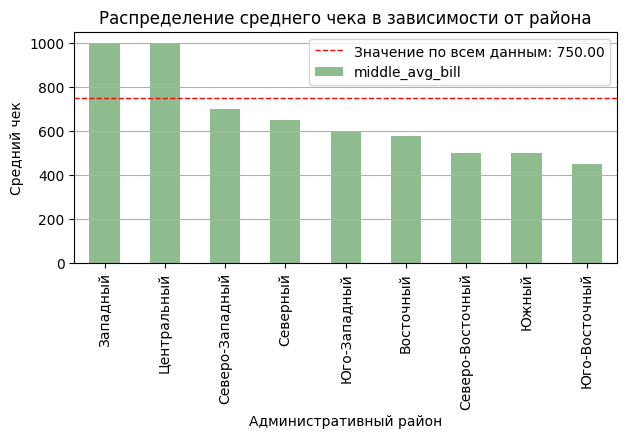

In [69]:
#подсчет медианы для каждого округа с сортировкой
category_group_df= rest_df.groupby('district', as_index=False)['middle_avg_bill'].median().sort_values(by='middle_avg_bill', ascending=False)

#построение столбчатой диаграммы со значением среднего чека для каждого округа
category_group_df.plot(kind='bar',
                       x='district',
                       figsize=(7, 3),
                       color='darkseagreen'
                      )

#создание переменной со значением среднего чека для всего датафрейма
median_middle_avg_bill = rest_df['middle_avg_bill'].median()

# добавление на график линии со значением mean_middle_avg_bill
plt.axhline(median_middle_avg_bill, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным: {median_middle_avg_bill:.2f}'
           )


plt.title('Распределение среднего чека в зависимости от района')
plt.xlabel('Административный район')
plt.ylabel('Средний чек')
plt.grid(axis='y')
plt.legend()

plt.show()

Значение среднего чека в разрезе округов варьируется.   
В топ-3 входит *Центр, Запад и Северо-Запад* (`1000 руб., 1000 руб., 700 руб.` соответственно), минимальный чек характерен для юго-восточной части города (`450 руб.`). Если посмотреть на средний чек вцелом (`750`), то только значение первых двух позиции превышает его.   
Таким образом, заведения с высоким чеком сосредоточены в *центральной* и *западных* частях города. С удаленностью от центра чек снижается (особенно по направлению *юга* и *востока*, с *северным* направлением разрыв незначительно меньше).

###   Промежуточный вывод   

Исследовательский анализ данных показал:
- наличие разных категорий заведений общественного питания, которые имеют существенную разницу в численность. Самые распространенные *кафе* и *ресторан*;
- неравномерное распределение заведений по округам с явным лидерством *центрального* района, в котором представлены все возможные категории заведений (в соотношении между категориями явных отличий от данных по всему городу не выявлено);
- преобладание *несетевых* заведений (62%). Заведения сетевого характерны для непопулярных (по количеству) категорий;
- размах значений в количестве посадочных мест в заведениях, при этом в среднем на одно заведение приходится от 55 до 90 мест (без явной зависимости от категориии заведения);
- отсутствие сильной связи между рейтингом и категорией заведения, а также др. параметрами;
- наличие только одной сети с заведениями в количестве более 100 и преобладание среди сетей заведений категории *кофейня*;
- связь среднего чека с расположением заведения (снижение чека по мере удаленности от центра и западной части города).  

## 4. Итоговый вывод и рекомендации

1. Общий обзор проделанной работы.

В ходе исследования проанализированы данные 8402 заведений г.Москвы. Данные включали информацию о категории заведения, местоположении, рейтинге, графике работы, ценах. Наибольшее внимание в процессе исследования уделялось определению характеристик для заведения, которое станет наиболее подходящим вариантом для инвестирования.

2. Ответы на исследовательские вопросы, или главные выводы.
   
На основе итогов исследовательского анализа данных рынок заведений общественного питания в г.Москва выглядит следующим образом:
- имеется разнообразие в категориях заведений;
- большая часть заведений сосредоточена в Центральном районе;
- свыше половины заведений представлены одной точкой и не входят в сеть;
- в основном заведения расчитаны на одномоментное наличие посетителей в количестве 100 человек.

Если рассматривать данные, с точки зрения наличие зависимостей между различными характеристиками рынка, то:
- явных факторов, влияющих на рейтинг заведения не выявлено;
- наиболее прибыльные, с точки зрения, среднего чека заведения расположены в центральном и западных районах города;
- популярность сети не зависит напрямую от категории заведений, но все же наблюдается преобладание среди *кофейн*.

3. Рекомендации на основе анализа данных.

В качестве рекомендаций обратить внимание на несетевое заведение, т.к. сеть потребует сразу значительного вложения.  
В части района наиболее привлекательным выглядит вариант с Западом (средний чек высокий, при этом стоимость помещения должна быть ниже чем в Центральном районе). Дополнительно можно провести анализ районов на предмет оценки стоимости помещений (потенциальные издержки) и количества населения (потенциальный поток клиентов).  
Также с учетом насыщенности рынка можно рассмотреть вариант с нишевым заведением (категорией, которая не представлена большим количеством заведений в городе, например, булочная). Но предварительно нужно детально изучить данные по этой категории.